In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

data = pd.read_csv('Cardio_DataSet.csv')

In [3]:
print(data.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [4]:
# Display the first few rows of the dataset

print(data.head(10))

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47
5   TM195   20  Female         14     Partnered      3        3   32973     66
6   TM195   21  Female         14     Partnered      3        3   35247     75
7   TM195   21    Male         13        Single      3        3   32973     85
8   TM195   21    Male         15        Single      5        4   35247    141
9   TM195   21  Female         15     Partnered      2        3   37521     85


In [5]:
# Data preprocessing
# Check for missing values

print(data.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


## 1. Customer Segmentation by Product

In [6]:
def customer_segmentation(data):
    seg = data.groupby('Product').agg({
        'Age': 'mean',
        'Gender': lambda x: x.value_counts().index[0],
        'Education': lambda x: x.value_counts().index[0],
        'Income': 'mean',
        'Fitness': lambda x: x.value_counts().index[0]
    }).reset_index()
    return seg

segmentation = customer_segmentation(data)
print(segmentation)

  Product    Age Gender  Education     Income  Fitness
0   TM195  28.55   Male         16  46418.025        3
1   TM498  28.90   Male         16  48973.650        3
2   TM798  29.10   Male         18  75441.575        5


C:\Users\MEERS\AppData\Local\Temp\ipykernel_3836\2426864621.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=segmentation, y='Age', x='Product', ax=axes[0, 0], palette='Set2')


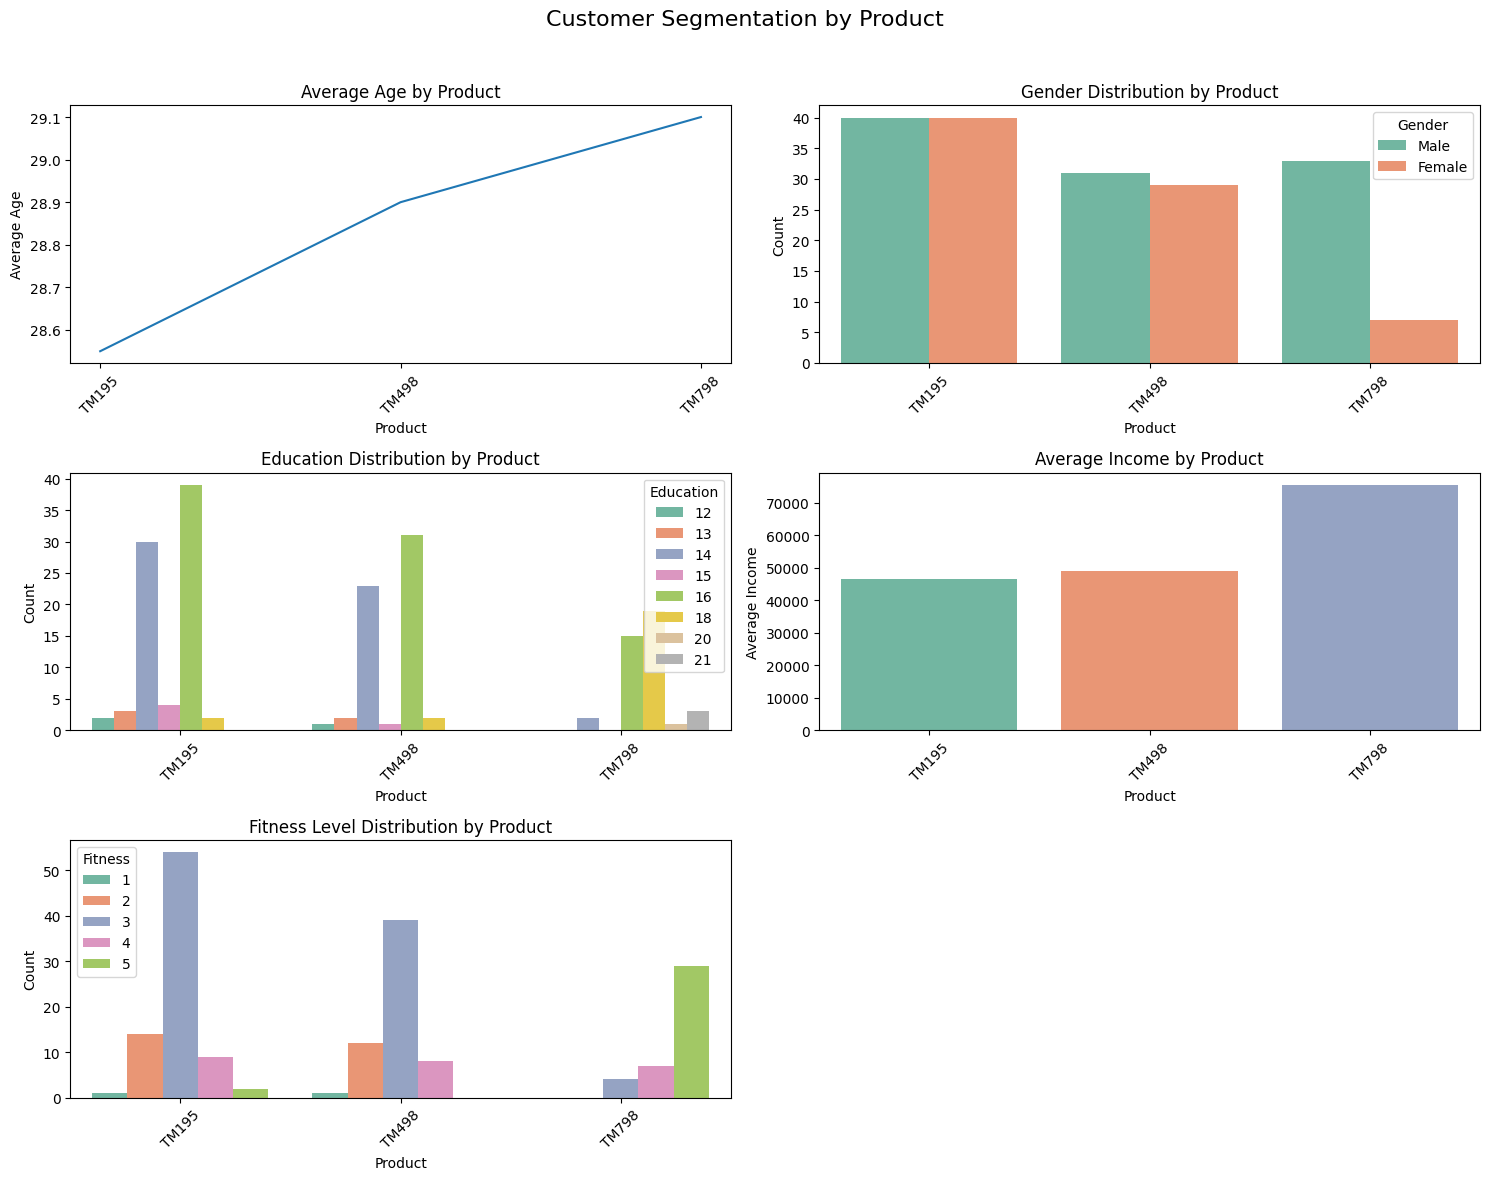

In [7]:
# Set up the figure for multiple plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Customer Segmentation by Product', fontsize=16)

# 1. Average Age by Product
sns.lineplot(data=segmentation, y='Age', x='Product', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Average Age by Product')
axes[0, 0].set_ylabel('Average Age')
axes[0, 0].set_xlabel('Product')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Gender Distribution by Product
sns.countplot(data=data, x='Product', hue='Gender', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Gender Distribution by Product')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Product')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Education Distribution by Product
sns.countplot(data=data, x='Product', hue='Education', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Education Distribution by Product')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Product')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Average Income by Product
sns.barplot(data=segmentation, x='Product', y='Income', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Average Income by Product')
axes[1, 1].set_ylabel('Average Income')
axes[1, 1].set_xlabel('Product')
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Fitness Level Distribution by Product
sns.countplot(data=data, x='Product', hue='Fitness', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Fitness Level Distribution by Product')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_xlabel('Product')
axes[2, 0].tick_params(axis='x', rotation=45)

# Hide the last subplot (if not needed)
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


## 2. Usage Patterns

In [9]:
def usage_patterns(data):
    usage = data.groupby('Product').agg({
        'Usage': 'mean',
        'Miles': 'mean'
    }).reset_index()
    return usage

usage_data = usage_patterns(data)
print(usage_data)

  Product     Usage       Miles
0   TM195  3.087500   82.787500
1   TM498  3.066667   87.933333
2   TM798  4.775000  166.900000


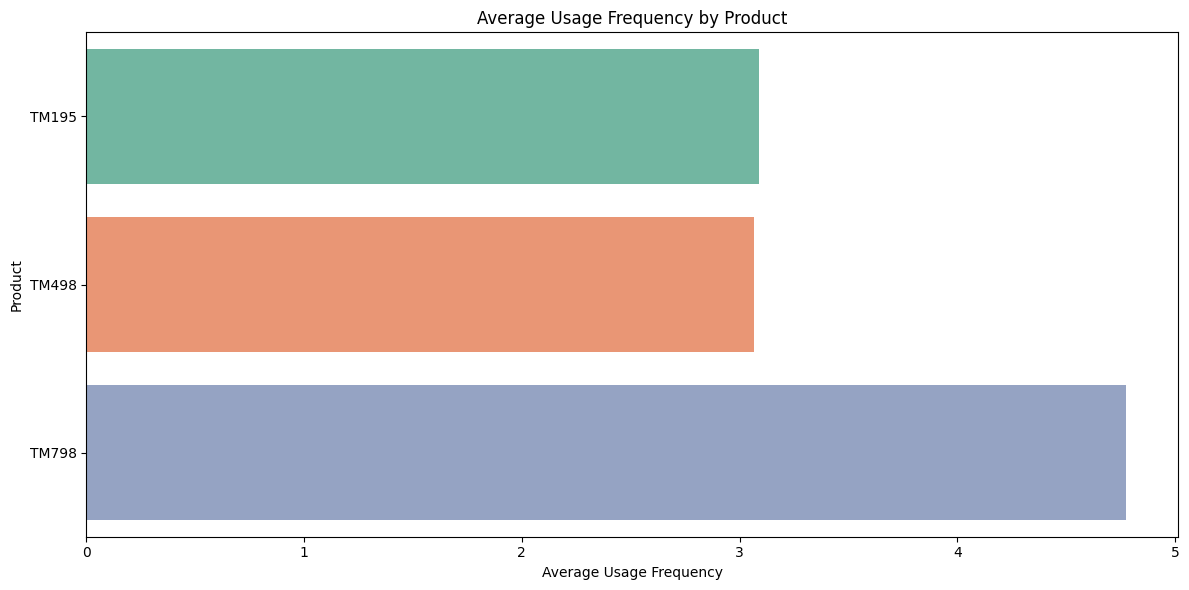

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=usage_data, y='Product', x='Usage', palette='Set2')
plt.title('Average Usage Frequency by Product')
plt.xlabel('Average Usage Frequency')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

## 3. Fitness and Lifestyle Insights

   Fitness Most_Common_Product
0        1               TM195
1        2               TM195
2        3               TM195
3        4               TM195
4        5               TM798


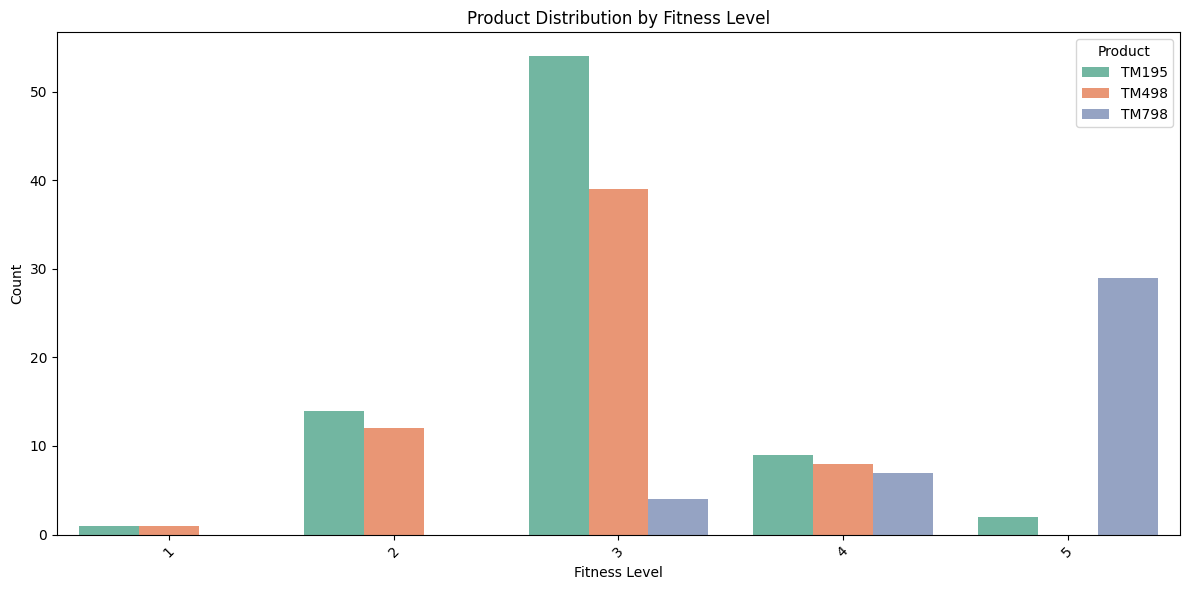

In [11]:
def fitness_correlation(data):
    correlation = data.groupby('Fitness')['Product'].agg(lambda x: x.value_counts().index[0]).reset_index()
    correlation.columns = ['Fitness', 'Most_Common_Product']
    return correlation

fitness_insights = fitness_correlation(data)
print(fitness_insights)


# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Fitness', hue='Product', palette='Set2')
plt.title('Product Distribution by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.legend(title='Product', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Income and Pricing Strategy

In [12]:
def income_analysis(data):
    income_analysis = data.groupby('Product').agg({
        'Income': 'mean'
    }).reset_index()
    return income_analysis

income_data = income_analysis(data)
print(income_data)

  Product     Income
0   TM195  46418.025
1   TM498  48973.650
2   TM798  75441.575


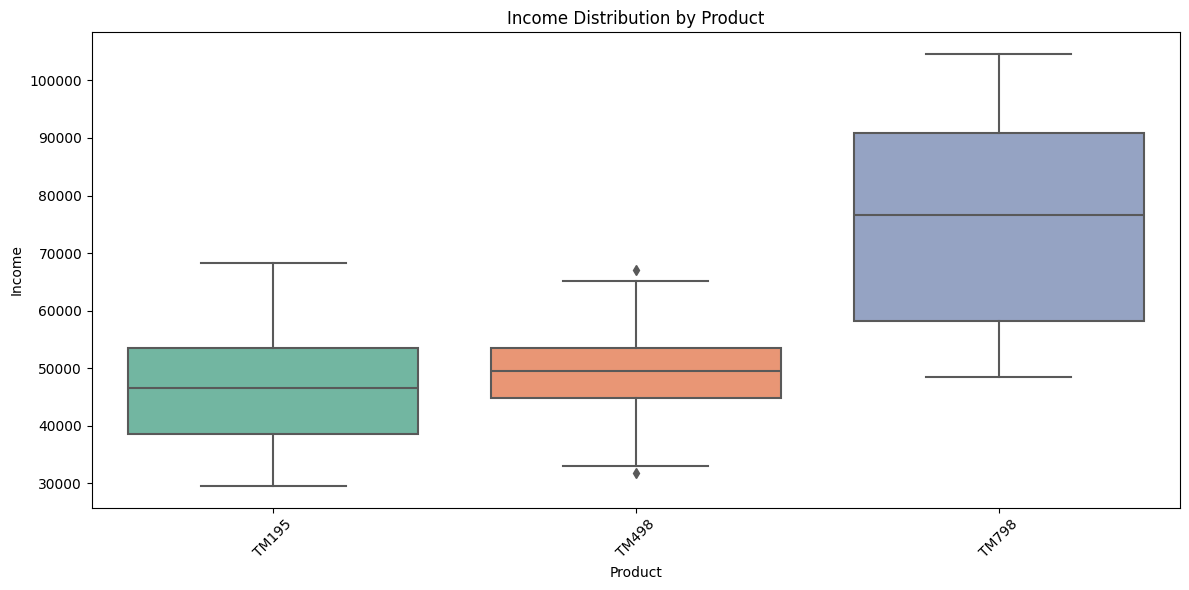

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Product', y='Income', palette='Set2')
plt.title('Income Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Targeting New Customers

In [14]:
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Income': [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000],
    'Product': ['TM195', 'TM498', 'TM195', 'TM498', 'TM195', 'TM498', 'TM195', 'TM498'],
    'Fitness': ['Beginner', 'Intermediate', 'Advanced', 'Beginner', 'Advanced', 'Intermediate', 'Beginner', 'Advanced']
})


In [15]:
def target_segments(data):
    target = data.groupby('Product').agg({
        'Age': 'mean',
        'Income': 'mean',
        'Fitness': lambda x: x.value_counts().index[0],
        'Gender': lambda x: x.value_counts().index[0]
    }).reset_index()
    return target

targeting_data = target_segments(data)
print(targeting_data)

  Product   Age   Income       Fitness  Gender
0   TM195  40.0  60000.0      Beginner    Male
1   TM498  45.0  70000.0  Intermediate  Female


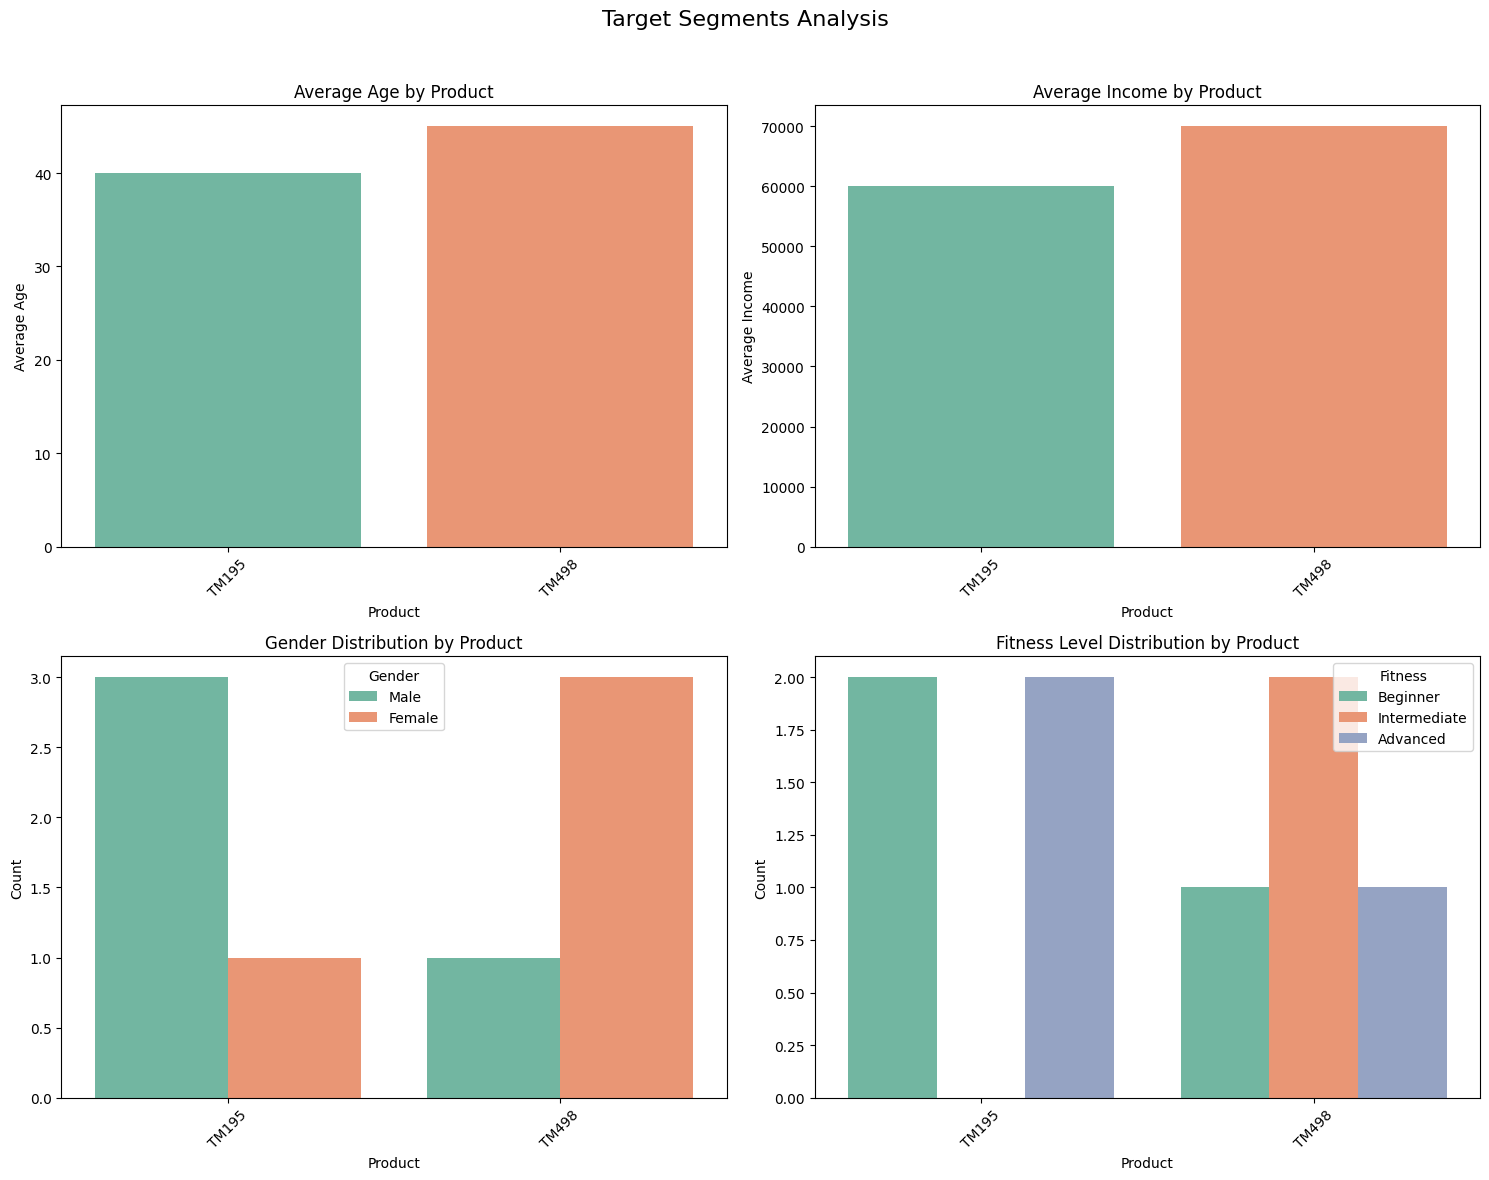

In [16]:
#plotting multiple visuals in a single frame
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Target Segments Analysis', fontsize=16)

# 1. Average Age by Product
sns.barplot(data=targeting_data, x='Product', y='Age', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Average Age by Product')
axes[0, 0].set_ylabel('Average Age')
axes[0, 0].set_xlabel('Product')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Average Income by Product
sns.barplot(data=targeting_data, x='Product', y='Income', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Average Income by Product')
axes[0, 1].set_ylabel('Average Income')
axes[0, 1].set_xlabel('Product')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Gender Distribution by Product
sns.countplot(data=data, x='Product', hue='Gender', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Gender Distribution by Product')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Product')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Fitness Level Distribution by Product
sns.countplot(data=data, x='Product', hue='Fitness', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Fitness Level Distribution by Product')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Product')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

## Conclusion:

The analysis of customer profiles and their preferences for CardioGoodFitness products has provided several actionable insights:

Customer Segmentation: Key demographics such as age, gender, and income level were identified for each product category. For example, Product TM195 appeals to younger customers with moderate fitness levels, while TM498 is favored by high-income individuals who prioritize advanced fitness equipment.

Usage Patterns: Customers of premium products tend to have higher usage frequencies and expectations of running more miles. This indicates that these products are better suited for dedicated fitness enthusiasts.

Fitness and Lifestyle Correlation: A clear relationship between fitness levels and product preference was observed, with advanced products attracting customers who are more fitness-focused.

Income and Pricing Strategy: Higher-income groups are inclined toward premium products, suggesting the potential to design tiered pricing and targeted promotions to appeal to different income segments.

Targeting New Customers: Based on the existing customer profiles, future marketing efforts can focus on expanding the reach to underrepresented demographics or those that show potential for higher product adoption, such as younger professionals or urban families interested in home fitness solutions.


## Recommendations for Action:

The findings suggest that CardioGoodFitness can optimize marketing strategies by tailoring campaigns to specific customer groups. Premium products could benefit from promotions highlighting advanced features, while entry-level products might attract more customers with bundled offers or introductory discounts. Emphasizing the health and lifestyle benefits of fitness equipment can also help retain customers and attract new segments, ultimately fostering business growth.